In [1]:
import pandas as pd

df = pd.read_csv("ted_main.csv", usecols=["duration"])
df.head()

,duration
0,1164
1,977
2,1286
3,1116
4,1190


In [2]:
from sklearn.neighbors import KernelDensity

X = df['duration'].values
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X.reshape(-1, 1))

In [3]:
import numpy as np

print(np.min(X))
print(np.max(X))

135
5256


In [4]:
test = np.arange(135, 5256, 10)

log_dens = kde.score_samples(test.reshape(-1, 1))

In [5]:
len(log_dens)

513

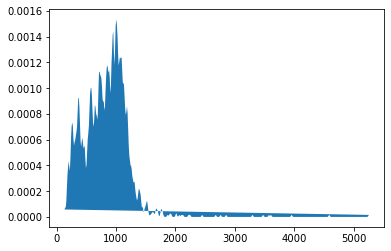

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.fill(test, np.exp(log_dens))
plt.show()

In [19]:
import math
import numpy as np

def cal_pazen_prob(X, test, window_size):
    result = []
    X = np.array(X)
    n = len(X)
    coef = 1/math.sqrt(2*math.pi)
    
    for val in test:
        s = X-val
        s = s**2
        s = s/(2*(window_size**2))
        s = np.exp(-1 * s)
        s = s*coef
        s = sum(s)
        result.append(s / (n * window_size))
    return result

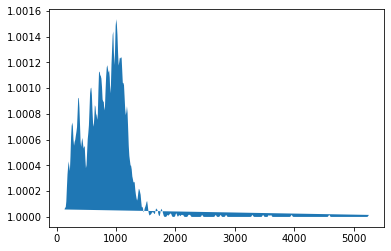

In [23]:
probs = cal_pazen_prob(X, test, 10)
plt.fill(test, np.exp(probs))
plt.show()

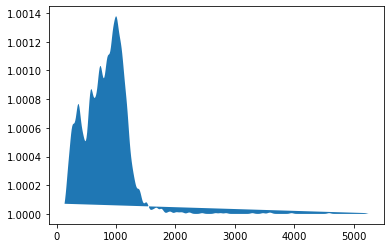

In [27]:
probs = cal_pazen_prob(X, test, 30)
plt.fill(test, np.exp(probs))
plt.show()

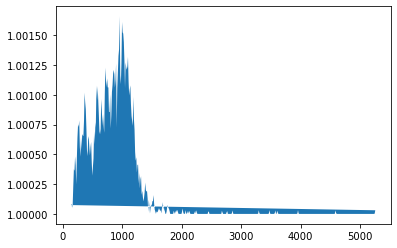

In [28]:
probs = cal_pazen_prob(X, test, 5)
plt.fill(test, np.exp(probs))
plt.show()

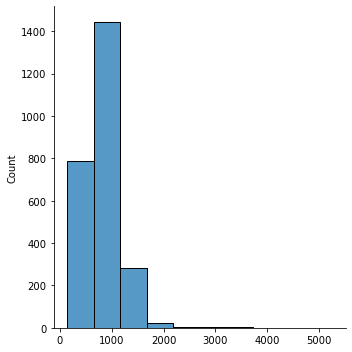

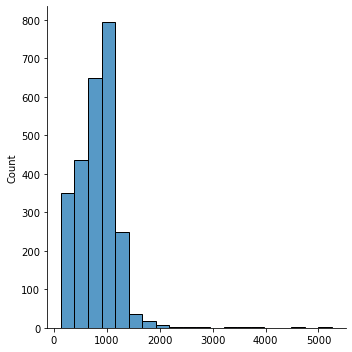

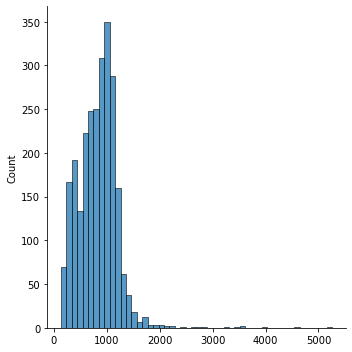

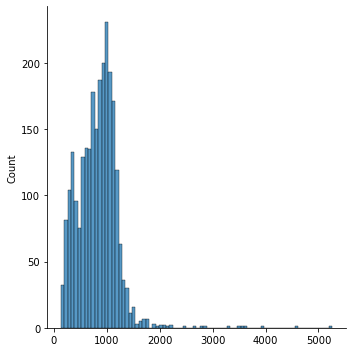

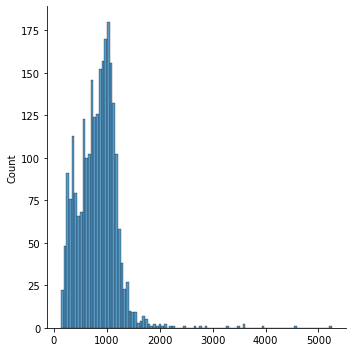

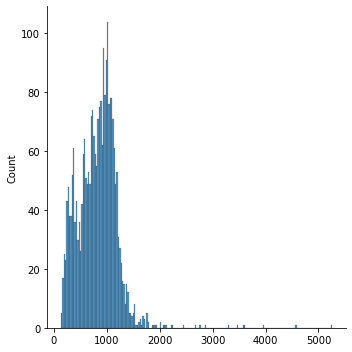

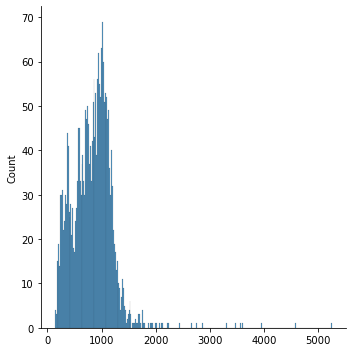

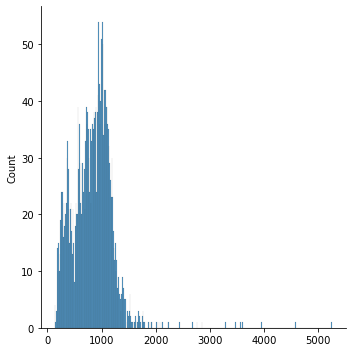

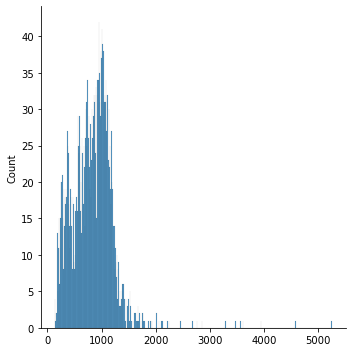

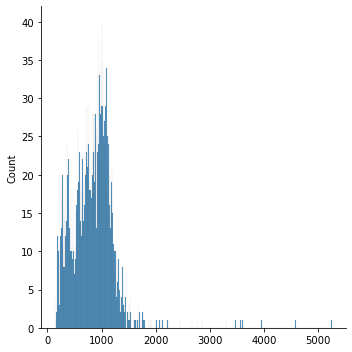

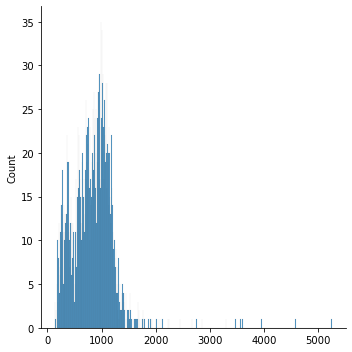

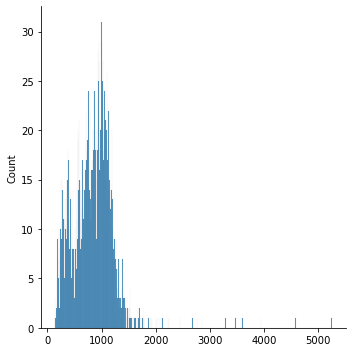

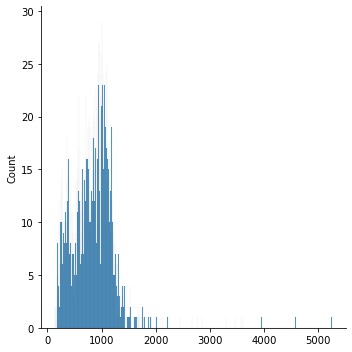

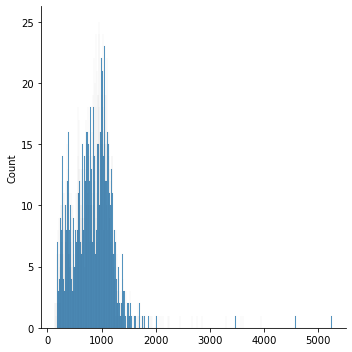

In [60]:
import seaborn as sns
import time

bins = [10, 20, 50, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for bin in bins:
    _ = sns.displot(X, bins=bin)